Exercise 2 : Data Mining

### Instructions

The questions in this exercise can be answered separately, meaning they are independent from each other, apart from the Question 1, in which you define a performance measure that is used in some other questions.

You will write your answers to the questions below in a [Jupyter notebook](https://jupyter.org/). For each question, please provide the appropriate explanations in _English_, the `python3` code you wrote to answer the question and finally any graphical representation.

You will post the notebook to https://github.com/ under your account.
**Please, also follow the privacy instructions that have been given to you in the email we sent you.**

### Context

We develop a technology that allows a viewer watching a video online to download the video data either from the broadcaster's Content Delivery Network ('CDN') or from a Peer to Peer Network, using other viewers on the same stream as sources.

During their session, each viewer sends payloads **every two minutes**, containing some metrics collected by our P2P client. The dataset attached to this file (**dstest.zip**) is a sample of those payloads. Each row is a payload sent by a viewer, and has the following columns:

* **company** : The name of the company providing the stream being watched by the user that sent the payload
* **live** : A string indicating if the video being watched is a live stream or a VOD stream
* **content** : The name of the content being watched by the viewer sending the payload
* **p2p** : The volume of data (in bytes) **downloaded through the P2P network** from other viewers during the payload timespan (2 minutes)
* **cdn** : The volume of data (in bytes) **downloaded the CDN** during the payload timespan (2 minutes)
* **upload** : The volume of data (in bytes) **uploaded to other viewers** on the P2P network during the payload timespan (2 minutes)
* **peers_count** : Average number of peers connected to the users during the payload timespan
* **timestamp** : Unix timestamp (UTC) of the moment the payload was sent
* **sessionDuration** : **Total time** elapsed since the beginning of the video session (in milliseconds)
* **playbackErrorCount** : Number of playback errors that occurred during the payload timespan
* **totalPlaybackErrorCount** : Number of playback errors that have occurred since the beginning of the viewer's session


In [3]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
df = pd.read_csv("/Users/letoussec/Downloads/test/dataMining/dstest.csv",sep= ',')

In [5]:
df['date'] = pd.to_datetime(df.timestamp,unit='ms')

In [6]:
df.head()

,company,live,mediaEngine,p2p,cdn,upload,peers_count,peers_match,timestamp,sessionDuration,playbackErrorCount,totalPlaybackErrorCount,content,date
0,Streamroot TV,VOD,ME1,0.0,8507376.0,0.0,0.0,1,1562469807407,120000.0,0,0,content-09235,2019-07-07 03:23:27.407
1,Streamroot TV,VOD,ME1,0.0,5778744.0,0.0,0.0,0,1562469927310,240000.0,0,0,content-09235,2019-07-07 03:25:27.310
2,Streamroot TV,VOD,ME1,0.0,7692960.0,0.0,0.0,0,1562470047330,360000.0,0,0,content-09235,2019-07-07 03:27:27.330
3,Streamroot TV,VOD,ME1,0.0,8229888.0,0.0,0.0,0,1562470167720,480000.0,0,0,content-09235,2019-07-07 03:29:27.720
4,Streamroot TV,VOD,ME1,0.0,10387000.0,0.0,0.0,0,1562470287353,600000.0,0,0,content-09235,2019-07-07 03:31:27.353


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385165 entries, 0 to 385164
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   company                  385165 non-null  object        
 1   live                     385165 non-null  object        
 2   mediaEngine              385165 non-null  object        
 3   p2p                      385165 non-null  float64       
 4   cdn                      385165 non-null  float64       
 5   upload                   385165 non-null  float64       
 6   peers_count              385165 non-null  float64       
 7   peers_match              385165 non-null  int64         
 8   timestamp                385165 non-null  int64         
 9   sessionDuration          385165 non-null  float64       
 10  playbackErrorCount       385165 non-null  int64         
 11  totalPlaybackErrorCount  385165 non-null  int64         
 12  content         

In [8]:
df.isna().mean()

company                    0.0
live                       0.0
mediaEngine                0.0
p2p                        0.0
cdn                        0.0
upload                     0.0
peers_count                0.0
peers_match                0.0
timestamp                  0.0
sessionDuration            0.0
playbackErrorCount         0.0
totalPlaybackErrorCount    0.0
content                    0.0
date                       0.0
dtype: float64

### Questions

#### Question 1

Knowing the goal of the our technology, define a metric to measure our performance. Calculate that performance score for each of the companies in the dataset.

#### The metric will calculate the proportion of volume of data (in bytes) downloaded per payload by the P2P network compare to the CDN network. (streaming directly imputable to streamroot technology).

In [9]:
df['p2p_share_in_download'] = 100*(df.p2p / (df.p2p+df.cdn))

In [10]:
#mean of the metric by payloads
metric_companies = df.pivot_table(index='company',values='p2p_share_in_download').sort_values('p2p_share_in_download',ascending=False)
metric_companies

,p2p_share_in_download
company,
Streamroot TV,42.972162
Flash Infos,36.814194
Sports News,24.055340


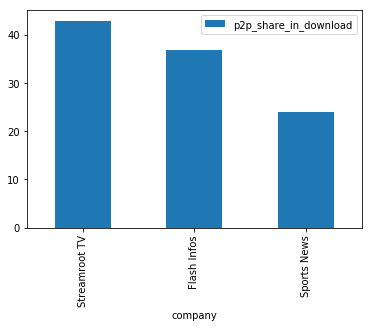

In [11]:
metric_companies.plot(kind='bar')

**This new metric should be analyzed with the different categorical variables**`

Here is an example :

In [12]:
#creation of bins of data from the sessionDuration (quartile here)
df["session_duration_bins"]=pd.qcut(df.sessionDuration,4)

In [13]:
bins = df.pivot_table(index=['company','session_duration_bins'],values='p2p_share_in_download').reset_index().sort_values('company',ascending=True)
bins

,company,session_duration_bins,p2p_share_in_download
0,Flash Infos,"(119999.999, 720000.0]",30.617094
1,Flash Infos,"(720000.0, 1560000.0]",39.564904
2,Flash Infos,"(1560000.0, 3000000.0]",32.947355
3,Flash Infos,"(3000000.0, 21480000.0]",48.614825
4,Sports News,"(119999.999, 720000.0]",22.729888
5,Sports News,"(720000.0, 1560000.0]",28.713644
6,Sports News,"(1560000.0, 3000000.0]",24.518531
7,Sports News,"(3000000.0, 21480000.0]",22.584172
8,Streamroot TV,"(119999.999, 720000.0]",39.705976
9,Streamroot TV,"(720000.0, 1560000.0]",40.907128


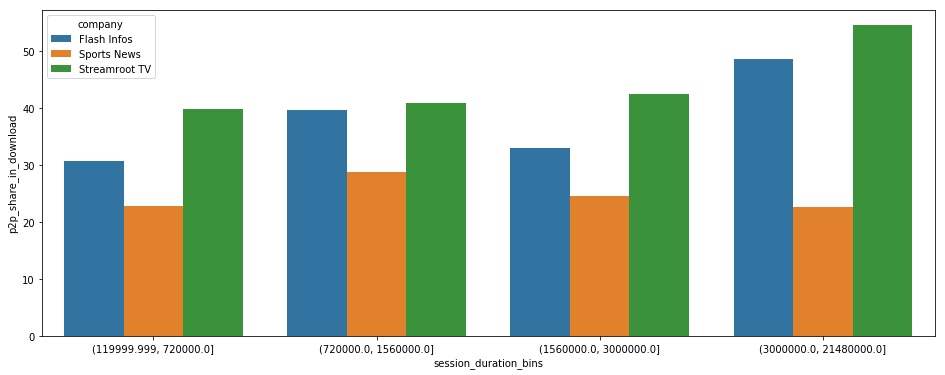

In [14]:
plt.figure(figsize=(16, 6))
sns.barplot(data=bins,x='session_duration_bins',y='p2p_share_in_download',hue='company')

Stre****t technology appears to be more and more efficient when the session lasts

#### Question 2

##### 2.1
How can we know whether a payload is the first payload of a viewer's session?

A sessionDuration lasts 2minutes i.e ,120 seconds and 120000 ms

In [15]:
df.query('sessionDuration == 120000')

,company,live,mediaEngine,p2p,cdn,upload,peers_count,peers_match,timestamp,sessionDuration,playbackErrorCount,totalPlaybackErrorCount,content,date,p2p_share_in_download,session_duration_bins
0,Streamroot TV,VOD,ME1,0.0,8507376.0,0.0,0.00,1,1562469807407,120000.0,0,0,content-09235,2019-07-07 03:23:27.407,0.000000,"(119999.999, 720000.0]"
16,Streamroot TV,VOD,ME1,0.0,17608456.0,0.0,0.00,1,1562477387430,120000.0,0,0,content-17013,2019-07-07 05:29:47.430,0.000000,"(119999.999, 720000.0]"
21,Streamroot TV,VOD,ME1,166409328.0,11303312.0,0.0,19.11,38,1562468705805,120000.0,0,0,content-08963,2019-07-07 03:05:05.805,93.639557,"(119999.999, 720000.0]"
53,Streamroot TV,VOD,ME1,0.0,14936600.0,0.0,0.00,0,1562469688171,120000.0,0,0,content-14278,2019-07-07 03:21:28.171,0.000000,"(119999.999, 720000.0]"
74,Streamroot TV,VOD,ME1,0.0,15740112.0,0.0,0.00,0,1562478964956,120000.0,0,0,content-16536,2019-07-07 05:56:04.956,0.000000,"(119999.999, 720000.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385101,Streamroot TV,VOD,ME1,122891464.0,1946928.0,0.0,6.22,9,1562478081892,120000.0,0,0,content-01158,2019-07-07 05:41:21.892,98.440441,"(119999.999, 720000.0]"
385107,Streamroot TV,VOD,ME1,0.0,6409296.0,0.0,0.00,0,1562465908584,120000.0,0,0,content-04063,2019-07-07 02:18:28.584,0.000000,"(119999.999, 720000.0]"
385124,Streamroot TV,VOD,ME1,0.0,3240932.0,0.0,0.00,1,1562466022339,120000.0,0,0,content-07336,2019-07-07 02:20:22.339,0.000000,"(119999.999, 720000.0]"
385134,Streamroot TV,VOD,ME1,0.0,19570048.0,0.0,0.00,0,1562459158348,120000.0,0,0,content-15027,2019-07-07 00:25:58.348,0.000000,"(119999.999, 720000.0]"


##### 2.2
Add a column `isFirstPayload` to the dataset, that must be `True` if the row represents a payload that was **the first payload** sent by a viewer, and `False` otherwise.

In [16]:
#creation of the column 'isFirstPayload'
df['isFirstPayload'] =  df.loc[:,'sessionDuration'].apply(lambda x: True if x == 120000 else False)

In [17]:
df.head()

,company,live,mediaEngine,p2p,cdn,upload,peers_count,peers_match,timestamp,sessionDuration,playbackErrorCount,totalPlaybackErrorCount,content,date,p2p_share_in_download,session_duration_bins,isFirstPayload
0,Streamroot TV,VOD,ME1,0.0,8507376.0,0.0,0.0,1,1562469807407,120000.0,0,0,content-09235,2019-07-07 03:23:27.407,0.0,"(119999.999, 720000.0]",True
1,Streamroot TV,VOD,ME1,0.0,5778744.0,0.0,0.0,0,1562469927310,240000.0,0,0,content-09235,2019-07-07 03:25:27.310,0.0,"(119999.999, 720000.0]",False
2,Streamroot TV,VOD,ME1,0.0,7692960.0,0.0,0.0,0,1562470047330,360000.0,0,0,content-09235,2019-07-07 03:27:27.330,0.0,"(119999.999, 720000.0]",False
3,Streamroot TV,VOD,ME1,0.0,8229888.0,0.0,0.0,0,1562470167720,480000.0,0,0,content-09235,2019-07-07 03:29:27.720,0.0,"(119999.999, 720000.0]",False
4,Streamroot TV,VOD,ME1,0.0,10387000.0,0.0,0.0,0,1562470287353,600000.0,0,0,content-09235,2019-07-07 03:31:27.353,0.0,"(119999.999, 720000.0]",False


##### 2.3
Use that column to calculate the **number of distinct viewers** that sent payloads for each company.

In [18]:
distinct_viewers_by_company = df.pivot_table(index='company',values='isFirstPayload',aggfunc=sum)
distinct_viewers_by_company

,isFirstPayload
company,
Flash Infos,805
Sports News,115
Streamroot TV,19914


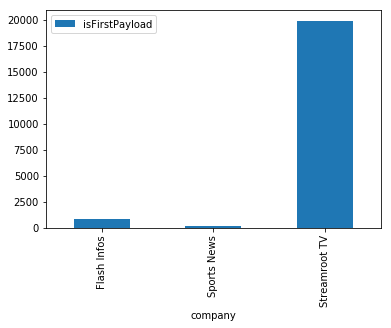

In [19]:
distinct_viewers_by_company.plot(kind="bar")

Is it true distinct viewers or the same persons watching different contents? 
we don't have the data to answer that question

#### Question 3

##### 3.1
Let's consider a viewer A who starts a video at T=0, then has a playback error at **T = 2 minutes 30 seconds**, and then another one at **T=6 minutes 20 seconds**. What will be the values of the fields `playbackErrorCount` and `totalPlaybackErrorCount` in the first 5 payloads sent by viewer A?

In [20]:
#creation of a dataframe representing this session
user_q3 = pd.DataFrame({'payloads_time_minutes': [2, 4, 6, 8,10], 'playback_error': [0, 1, 0,1,0], 'totalPlaybackErrorCount':[0,1,1,2,2]})
user_q3

,payloads_time_minutes,playback_error,totalPlaybackErrorCount
0,2,0,0
1,4,1,1
2,6,0,1
3,8,1,2
4,10,0,2


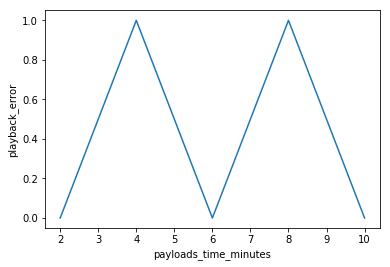

In [21]:
sns.lineplot(data=user_q3,x='payloads_time_minutes',y='playback_error')

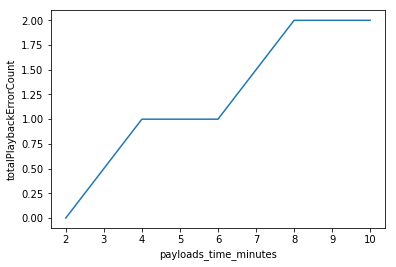

In [22]:
sns.lineplot(data=user_q3,x='payloads_time_minutes',y='totalPlaybackErrorCount')

In [23]:
#values of the fields playbackErrorCount in the first 5 payloads
user_q3.playback_error.to_list()

[0, 1, 0, 1, 0]

In [24]:
#values of the fields totalPlaybackErrorCount in the first 5 payloads
user_q3.totalPlaybackErrorCount.to_list()

[0, 1, 1, 2, 2]

##### 3.2
Calculate the **number of distinct viewers** that had **at least 1** playback error during their session.

In [25]:
# sum of the column playbackErrorCount (i.e number of errors)
df.playbackErrorCount.sum()

15

In [26]:
errors = df.query('playbackErrorCount != 0').groupby(['content','date']).sum()['playbackErrorCount'].reset_index()
errors

,content,date,playbackErrorCount
0,content-11564,2019-07-07 00:33:25.104,1
1,content-11564,2019-07-07 02:57:52.103,2
2,content-11564,2019-07-07 03:11:36.578,1
3,content-11564,2019-07-07 04:02:32.032,1
4,content-11566,2019-07-07 04:27:49.855,1
5,content-11567,2019-07-07 04:40:05.428,1
6,content-11572,2019-07-07 01:38:03.099,2
7,content-11572,2019-07-07 04:33:07.020,1
8,content-11572,2019-07-07 05:38:22.737,1
9,content-15468,2019-07-07 05:28:13.473,1


(737247.0000013773, 737247.2499994328)

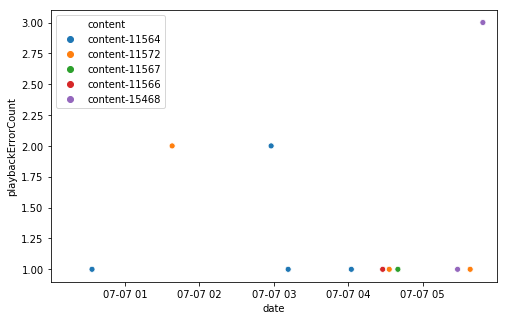

In [27]:
plt.figure(figsize=(8, 5))
graph_errors = sns.scatterplot(data=df.query('playbackErrorCount != 0'),x="date",y="playbackErrorCount",hue='content')
graph_errors.set_xlim(df['date'].min(), df['date'].max())

These 15 errors occurs during a short lapse of time (6hours) with 5 different contents  
For these reasons we can assuming that 5 distinct viewers had at least 1 playback error during their session.

#### Question 4

In this question, we only focus on customer **Streamr\*\*\*\* TV**.

We define the _concurrency_ as the number of viewers connected simustaneously on the **same content**, i.e the number of payloads we received during a given 2 minutes window on a given content.

In [28]:
df_stream_TV = df.loc[df['company'] == 'Streamroot TV' ,:]

##### 4.1
Add a column "readableDate" to the dataset that will be the beginning of the 2 minutes window during which the payload was sent. For example, if a payload was sent at 11:35, the column "readableDate" should be 11:34, if a payload was sent at 10:03, the "readableDate" should be 10:02.

In [29]:
df_stream_TV.head()

,company,live,mediaEngine,p2p,cdn,upload,peers_count,peers_match,timestamp,sessionDuration,playbackErrorCount,totalPlaybackErrorCount,content,date,p2p_share_in_download,session_duration_bins,isFirstPayload
0,Streamroot TV,VOD,ME1,0.0,8507376.0,0.0,0.0,1,1562469807407,120000.0,0,0,content-09235,2019-07-07 03:23:27.407,0.0,"(119999.999, 720000.0]",True
1,Streamroot TV,VOD,ME1,0.0,5778744.0,0.0,0.0,0,1562469927310,240000.0,0,0,content-09235,2019-07-07 03:25:27.310,0.0,"(119999.999, 720000.0]",False
2,Streamroot TV,VOD,ME1,0.0,7692960.0,0.0,0.0,0,1562470047330,360000.0,0,0,content-09235,2019-07-07 03:27:27.330,0.0,"(119999.999, 720000.0]",False
3,Streamroot TV,VOD,ME1,0.0,8229888.0,0.0,0.0,0,1562470167720,480000.0,0,0,content-09235,2019-07-07 03:29:27.720,0.0,"(119999.999, 720000.0]",False
4,Streamroot TV,VOD,ME1,0.0,10387000.0,0.0,0.0,0,1562470287353,600000.0,0,0,content-09235,2019-07-07 03:31:27.353,0.0,"(119999.999, 720000.0]",False


In [30]:
#create column'readableDate' : date (timestamp) - 1mn (6000ms)
df_stream_TV['readableDate'] = df['timestamp'] - 60000

/Users/letoussec/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
# column 'readableDate' at date format
df_stream_TV['readableDate'] = pd.to_datetime(df_stream_TV.readableDate,unit='ms')

/Users/letoussec/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [32]:
df_stream_TV.head()

,company,live,mediaEngine,p2p,cdn,upload,peers_count,peers_match,timestamp,sessionDuration,playbackErrorCount,totalPlaybackErrorCount,content,date,p2p_share_in_download,session_duration_bins,isFirstPayload,readableDate
0,Streamroot TV,VOD,ME1,0.0,8507376.0,0.0,0.0,1,1562469807407,120000.0,0,0,content-09235,2019-07-07 03:23:27.407,0.0,"(119999.999, 720000.0]",True,2019-07-07 03:22:27.407
1,Streamroot TV,VOD,ME1,0.0,5778744.0,0.0,0.0,0,1562469927310,240000.0,0,0,content-09235,2019-07-07 03:25:27.310,0.0,"(119999.999, 720000.0]",False,2019-07-07 03:24:27.310
2,Streamroot TV,VOD,ME1,0.0,7692960.0,0.0,0.0,0,1562470047330,360000.0,0,0,content-09235,2019-07-07 03:27:27.330,0.0,"(119999.999, 720000.0]",False,2019-07-07 03:26:27.330
3,Streamroot TV,VOD,ME1,0.0,8229888.0,0.0,0.0,0,1562470167720,480000.0,0,0,content-09235,2019-07-07 03:29:27.720,0.0,"(119999.999, 720000.0]",False,2019-07-07 03:28:27.720
4,Streamroot TV,VOD,ME1,0.0,10387000.0,0.0,0.0,0,1562470287353,600000.0,0,0,content-09235,2019-07-07 03:31:27.353,0.0,"(119999.999, 720000.0]",False,2019-07-07 03:30:27.353


##### 4.2
Plot the concurrency time series for the content `content-05335`.

In [33]:
#creation of two columns minute and hour to ease the visualization of the concurrency
df_stream_TV['minute'] = df_stream_TV['date'].dt.minute
df_stream_TV['hour'] = df_stream_TV['date'].dt.hour

/Users/letoussec/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/letoussec/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(0.0, 22.0)

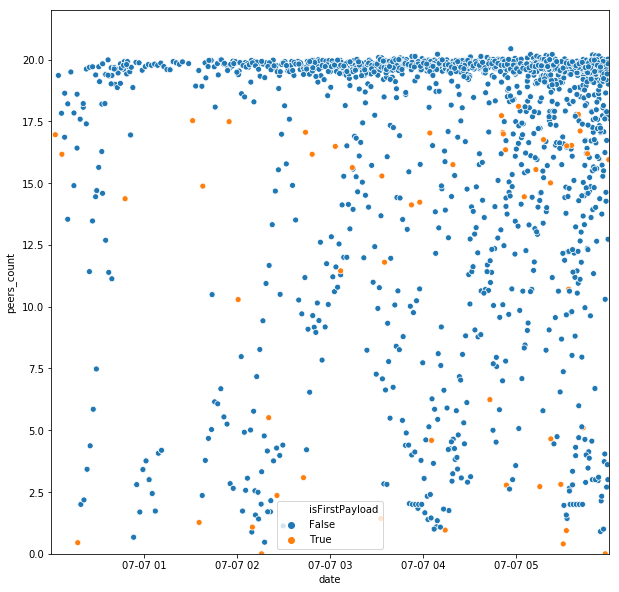

In [34]:
plt.figure(figsize=(10, 10))
content_05335 = sns.scatterplot(data=df_stream_TV.query('content ==  "content-05335"'),x="date",y="peers_count",hue='isFirstPayload')
content_05335.set_xlim(df_stream_TV['date'].min(), df_stream_TV['date'].max())
content_05335.set_ylim(df_stream_TV['peers_count'].min(), df_stream_TV['peers_count'].max())

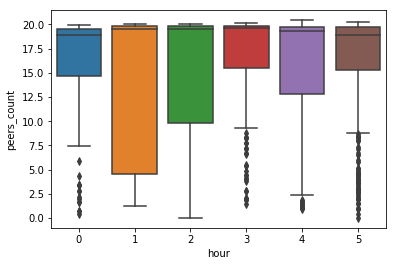

In [35]:
sns.boxplot(x="hour", y="peers_count", data=df_stream_TV.query('content ==  "content-05335"'))

Assuming to these two visualizations less traffic around 1am and 2am means less peers_count  
The median of peer_counts is around 19 on this lapse ot time

##### 4.3
What is the average performance measured when the concurrency is lower than 10?

In [161]:
df_stream_TV.head()

,company,live,mediaEngine,p2p,cdn,upload,peers_count,peers_match,timestamp,sessionDuration,playbackErrorCount,totalPlaybackErrorCount,content,date,p2p_share_in_download,session_duration_bins,isFirstPayload,readableDate,minute,hour
0,Streamroot TV,VOD,ME1,0.0,8507376.0,0.0,0.0,1,1562469807407,120000.0,0,0,content-09235,2019-07-07 03:23:27.407,0.0,"(119999.999, 720000.0]",True,2019-07-07 03:22:27.407,23,3
1,Streamroot TV,VOD,ME1,0.0,5778744.0,0.0,0.0,0,1562469927310,240000.0,0,0,content-09235,2019-07-07 03:25:27.310,0.0,"(119999.999, 720000.0]",False,2019-07-07 03:24:27.310,25,3
2,Streamroot TV,VOD,ME1,0.0,7692960.0,0.0,0.0,0,1562470047330,360000.0,0,0,content-09235,2019-07-07 03:27:27.330,0.0,"(119999.999, 720000.0]",False,2019-07-07 03:26:27.330,27,3
3,Streamroot TV,VOD,ME1,0.0,8229888.0,0.0,0.0,0,1562470167720,480000.0,0,0,content-09235,2019-07-07 03:29:27.720,0.0,"(119999.999, 720000.0]",False,2019-07-07 03:28:27.720,29,3
4,Streamroot TV,VOD,ME1,0.0,10387000.0,0.0,0.0,0,1562470287353,600000.0,0,0,content-09235,2019-07-07 03:31:27.353,0.0,"(119999.999, 720000.0]",False,2019-07-07 03:30:27.353,31,3


In [93]:
#calcul of the mean of the p2p_share_in_download with a peers_count lower than 10
df_stream_TV.query('peers_count < 10').pivot_table(index='peers_count', values='p2p_share_in_download').mean()

p2p_share_in_download    78.726456
dtype: float64

On average, with a peer count lower than 10, the Stream**** technology manages to make 78,7% of the volume of data (in bytes) downloaded to watch a content 

##### 4.4
Starting from which concurrency can we say there is a 75% chance that the performance on a content is higher than 80%?

In [159]:
#mean of p2p_share_in_download by peers_count
p2p_mean_by_peers_count = df_stream_TV.pivot_table(index='peers_count',values='p2p_share_in_download').reset_index()
test

,peers_count,p2p_share_in_download
0,0.00,0.021125
1,0.01,1.910111
2,0.02,0.482151
3,0.03,0.027588
4,0.04,8.044315
...,...,...
2091,21.24,100.000000
2092,21.31,100.000000
2093,21.32,100.000000
2094,21.49,100.000000


In [160]:
#3rd quantile (0,75) for p2p_share_in_download >= to 80%  
Q4_data= p2p_mean_by_peers_count.groupby('p2p_share_in_download').quantile(0.75).query('p2p_share_in_download >= 80').reset_index()
Q4_data

,p2p_share_in_download,peers_count
0,80.000000,5.64
1,80.042108,4.49
2,80.111167,2.41
3,80.213878,3.52
4,80.267898,3.83
...,...,...
1628,99.990821,10.52
1629,99.990822,19.55
1630,99.994448,20.08
1631,99.996586,19.99


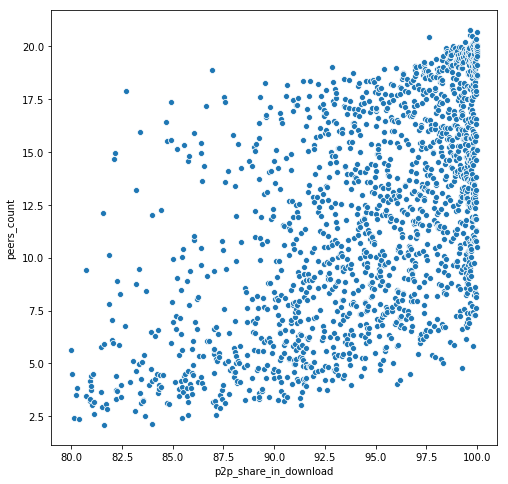

In [150]:
plt.figure(figsize=(8, 8))
sns.scatterplot(data=Q4_result,x='p2p_share_in_download',y='peers_count')

In [158]:
Q4_data.peers_count.min()

2.08

With a concurrency of 2.08 there is a 75% chance that the performance on a content is higher than 80%.

(120000.0, 21480000.0)

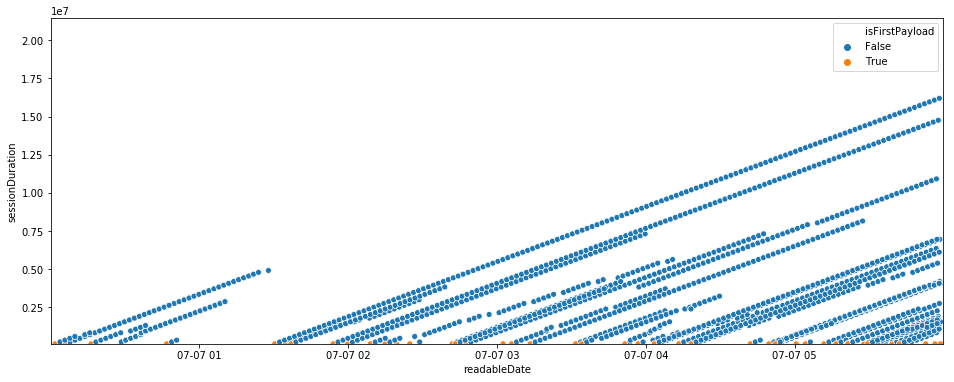

In [36]:
plt.figure(figsize=(16, 6))
content_05335 = sns.scatterplot(data=df_stream_TV.query('content ==  "content-05335"'),x="readableDate",y="sessionDuration",hue='isFirstPayload')
content_05335.set_xlim(df_stream_TV['date'].min(), df_stream_TV['date'].max())
content_05335.set_ylim(df_stream_TV['sessionDuration'].min(), df_stream_TV['sessionDuration'].max())


Vizualisation of the concurrency for content-05335:  
Each orange points represents a distinct viewer, and the blue ones (that formed a line starting with a orange point) represent the duration of the session of the viewer.